In [62]:
import numpy as np
import matplotlib.pylab as plt
import xarray as xr
import glidertools as gt
from netCDF4 import Dataset
import datetime
import pandas as pd
from glob import glob

In [63]:
from xml.dom import minidom
from urllib.request import urlopen
from urllib.request import urlretrieve

server_url = 'http://smode.whoi.edu:8080/thredds/'
# Everything after "catalog/"
request_url = 'insitu/navo_glider/'
usock = urlopen(server_url+request_url+'catalog.xml')

def get_elements(url, tag_name, attribute_name):
    """Get elements from an XML file"""
    # usock = urllib2.urlopen(url)
    usock = urlopen(url)
    xmldoc = minidom.parse(usock)
    usock.close()
    tags = xmldoc.getElementsByTagName(tag_name)
    attributes=[]
    for tag in tags:
        attribute = tag.getAttribute(attribute_name)
        attributes.append(attribute)
    return attributes


url = server_url + request_url + 'catalog.xml'

catalog = np.array(get_elements(url,'dataset','urlPath')[1:])





In [26]:
dd = datetime.datetime(2021,10,18).strftime("%m%d")
dd

'1018'

In [37]:
ddmm=['_'+ dd +'_' in links for links in catalog]

True

In [54]:
fles=['http://smode.whoi.edu:8080/thredds/dodsC/' + strng for strng in catalog]
fles=np.array(fles)[ddmm]

dat=xr.load_dataset(fles[3])  
dat.scitime

dat1=xr.load_dataset(fles[5])  
dat1.scitime
#dat=xr.open_mfdataset(filenames[1],dims='time')
#dat
#names= list(dat.keys())

# dat.merge(xr.load_dataset(filenames[1]))



<xarray.DataArray 'scitime' (time: 1711)>
array([1634521090000000000, 1634521098000000000, 1634521104000000000, ...,
       1634528218000000000, 1634528210000000000, 1634528202000000000],
      dtype='timedelta64[ns]')
Dimensions without coordinates: time
Attributes:
    standard_name:  time
    description:    sample time in GMT epoch format
    reference:      00:00Z 1 January 1970

In [61]:
time = dat.scitime*1e-9

depth = dat.depth
salt = dat.salinity

lon= dat.longitude;
#lon=np.where(lon>180,lon-360,lon)
lat=dat.latitude

temp=dat.temp

dt0=datetime.datetime(1970,1,1)
#date=dt0+datetime.timedelta(seconds=np.int(time[0]))
date=[dt0 + datetime.timedelta(seconds=np.int(segundos)) for segundos in time]
date=pd.DatetimeIndex(date)




time1 = dat1.scitime*1e-9

depth1 = dat1.depth
salt1 = dat1.salinity

lon1= dat1.longitude;
#lon=np.where(lon>180,lon-360,lon)
lat1=dat1.latitude

temp1=dat1.temp

dt1=datetime.datetime(1970,1,1)
#date=dt0+datetime.timedelta(seconds=np.int(time[0]))
date1=[dt1 + datetime.timedelta(seconds=np.int(segundos)) for segundos in time1]
date1=pd.DatetimeIndex(date1)



time1.shape

(1711,)

In [21]:
time = dat.scitime*1e-9

depth = dat.depth
salt = dat.salinity

lon= dat.longitude;
#lon=np.where(lon>180,lon-360,lon)
lat=dat.latitude

temp=dat.temp

dt0=datetime.datetime(1970,1,1)
#date=dt0+datetime.timedelta(seconds=np.int(time[0]))
date=[dt0 + datetime.timedelta(seconds=np.int(segundos)) for segundos in time]
date=pd.DatetimeIndex(date)

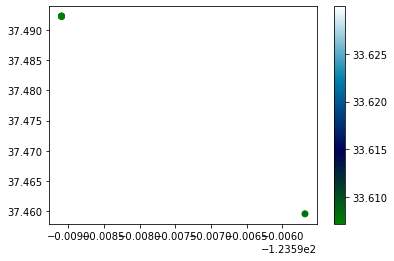

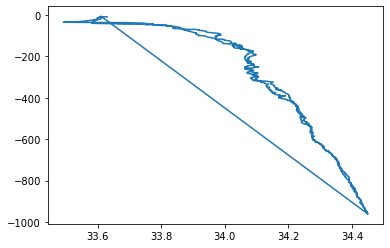

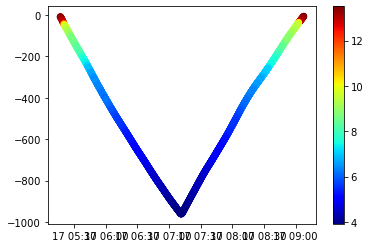

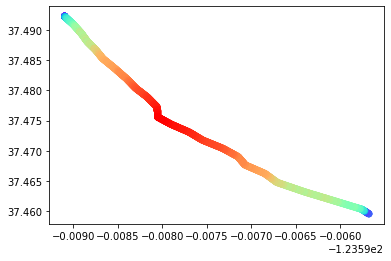

In [24]:

plt.figure()
plt.scatter(lon[depth<10],lat[depth<10],c=salt[depth<10],cmap='ocean')
plt.colorbar()

plt.figure()
plt.plot(salt,-depth)

lon.min()

plt.figure()
plt.scatter(date,-depth,c=temp,cmap='jet')
plt.colorbar()

plt.figure()
plt.scatter(lon,lat,c=salt,cmap='rainbow')